<a href="https://colab.research.google.com/github/jai2shan/TSAI-EVA40-Assignments/blob/master/Session%2012/OneCycleLR%20-%20Step%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/jai2shan/TSAI-EVA40-Assignments.git

fatal: destination path 'TSAI-EVA40-Assignments' already exists and is not an empty directory.


In [2]:
import os
os.chdir(r'/content/TSAI-EVA40-Assignments')
!git pull origin master

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), done.
From https://github.com/jai2shan/TSAI-EVA40-Assignments
 * branch                master     -> FETCH_HEAD
   49a33a993..83a8ef14c  master     -> origin/master
Updating 49a33a993..83a8ef14c
Fast-forward
 Session 12/Scripts/LR_Min_Max.py | 3 ++-
 1 file changed, 2 insertions(+), 1 deletion(-)


In [3]:
import os
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Scripts')

In [4]:
import torch
import torchvision
import os
from torchvision import transforms
from DataLoader import *

os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Data')
train_path = 'train'
test_path = 'test'
train_loader,test_loader = data_loader_(train_path,test_path,128)

In [5]:
import torch
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Scripts')
from resnet import ResNet18
net = ResNet18(num_classes = 200).to(device)
summary(net, input_size=(3,64,64))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1,


Learning rate search finished. See the graph with {finder_name}.plot()


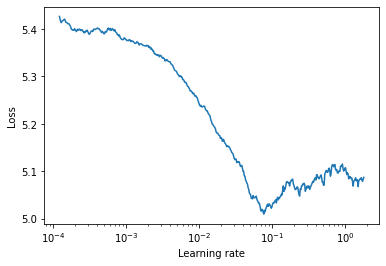

0.0771729367287237

In [6]:
from LR_Finder import *
from Training_Testing import *
tt = TrainTest()
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Data')

test_acc = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001)
# scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

lr_finder = LRFinder(net, optimizer, criterion)
lr_finder.range_test(train_loader, end_lr=2, num_iter=500,step_mode="exp")
lr_finder.plot()

import pandas as pd
lr_ = pd.DataFrame(lr_finder.history)
lr_max = lr_.loc[lr_['loss']==lr_['loss'].min(),'lr'].values[0]
lr_max

In [7]:
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Scripts')
from LR_Min_Max import *
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Data')

lr_min =  LR_Min(train_loader,lr_max)

  0%|          | 0/547 [00:00<?, ?it/s]

EPOCH: 0


Loss=3.9694488048553467 Batch_id=546 Accuracy=6.52: 100%|██████████| 547/547 [08:35<00:00,  1.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]

EPOCH: 1


Loss=3.6788787841796875 Batch_id=546 Accuracy=15.14: 100%|██████████| 547/547 [08:35<00:00,  1.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]

EPOCH: 2


Loss=3.3609673976898193 Batch_id=546 Accuracy=21.17: 100%|██████████| 547/547 [08:35<00:00,  1.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]

EPOCH: 0


Loss=4.228755474090576 Batch_id=546 Accuracy=6.95: 100%|██████████| 547/547 [08:37<00:00,  1.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]

EPOCH: 1


Loss=3.5994274616241455 Batch_id=546 Accuracy=15.52: 100%|██████████| 547/547 [08:40<00:00,  1.05it/s]
  0%|          | 0/547 [00:00<?, ?it/s]

EPOCH: 2


Loss=3.2300312519073486 Batch_id=546 Accuracy=22.01: 100%|██████████| 547/547 [08:37<00:00,  1.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]

EPOCH: 0


Loss=3.9738218784332275 Batch_id=546 Accuracy=7.39: 100%|██████████| 547/547 [08:37<00:00,  1.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]

EPOCH: 1


Loss=3.822178602218628 Batch_id=546 Accuracy=16.07: 100%|██████████| 547/547 [08:38<00:00,  1.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]

EPOCH: 2


Loss=3.0709211826324463 Batch_id=546 Accuracy=22.42: 100%|██████████| 547/547 [08:38<00:00,  1.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]

EPOCH: 0


Loss=4.021328926086426 Batch_id=546 Accuracy=6.88: 100%|██████████| 547/547 [08:36<00:00,  1.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]

EPOCH: 1


Loss=3.818920135498047 Batch_id=546 Accuracy=15.54: 100%|██████████| 547/547 [08:38<00:00,  1.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]

EPOCH: 2


Loss=3.275890350341797 Batch_id=546 Accuracy=22.30: 100%|██████████| 547/547 [08:38<00:00,  1.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]

EPOCH: 0


Loss=4.117201328277588 Batch_id=546 Accuracy=7.33: 100%|██████████| 547/547 [08:36<00:00,  1.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]

EPOCH: 1


Loss=3.4684484004974365 Batch_id=546 Accuracy=16.10: 100%|██████████| 547/547 [08:37<00:00,  1.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]

EPOCH: 2


Loss=3.2214391231536865 Batch_id=546 Accuracy=22.69: 100%|██████████| 547/547 [08:36<00:00,  1.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]

EPOCH: 0


Loss=4.2511491775512695 Batch_id=546 Accuracy=7.05: 100%|██████████| 547/547 [08:35<00:00,  1.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]

EPOCH: 1


Loss=3.4395432472229004 Batch_id=546 Accuracy=15.83: 100%|██████████| 547/547 [08:36<00:00,  1.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]

EPOCH: 2


Loss=3.5498268604278564 Batch_id=546 Accuracy=21.73: 100%|██████████| 547/547 [08:38<00:00,  1.06it/s]


In [ ]:
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Scripts')
from Training_Testing import TrainTest
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Data')

net = ResNet18(num_classes = 200).to(device)
tt = TrainTest()
test_acc = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.1, momentum = 0.85,weight_decay = 0.0005)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer,
                                          max_lr = lr_max, 
                                          pct_start = 0.3, # 15/50
                                          epochs =50,
                                          steps_per_epoch=len(train_loader),
                                          div_factor = 10,
                                          final_div_factor = 1)

for epoch in range(50):
    print("EPOCH:", epoch)
    tt.train_(net, device, train_loader, optimizer, criterion, epoch,L1 = False)
    acc = tt.test_(net, device, test_loader)  
    scheduler.step()
       
print('Finished Training')

  0%|          | 0/547 [00:00<?, ?it/s]

EPOCH: 0


Loss=4.127475261688232 Batch_id=546 Accuracy=6.25: 100%|██████████| 547/547 [08:38<00:00,  1.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -2.4557, Accuracy: 2800/30000 (9.33%)

EPOCH: 1


Loss=3.6927073001861572 Batch_id=546 Accuracy=13.61: 100%|██████████| 547/547 [08:38<00:00,  1.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -3.8219, Accuracy: 5117/30000 (17.06%)

EPOCH: 2


Loss=3.4387073516845703 Batch_id=546 Accuracy=19.95: 100%|██████████| 547/547 [08:38<00:00,  1.05it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -4.4432, Accuracy: 6809/30000 (22.70%)

EPOCH: 3


Loss=3.1647911071777344 Batch_id=546 Accuracy=24.91: 100%|██████████| 547/547 [08:40<00:00,  1.05it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -5.1962, Accuracy: 7885/30000 (26.28%)

EPOCH: 4


Loss=3.0437586307525635 Batch_id=546 Accuracy=28.80: 100%|██████████| 547/547 [08:39<00:00,  1.05it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -5.5757, Accuracy: 8686/30000 (28.95%)

EPOCH: 5


Loss=2.6815993785858154 Batch_id=546 Accuracy=32.65: 100%|██████████| 547/547 [08:38<00:00,  1.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -6.1518, Accuracy: 9759/30000 (32.53%)

EPOCH: 6


Loss=2.7084481716156006 Batch_id=546 Accuracy=35.91: 100%|██████████| 547/547 [08:37<00:00,  1.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -6.4846, Accuracy: 10571/30000 (35.24%)

EPOCH: 7


Loss=2.705446481704712 Batch_id=546 Accuracy=38.33: 100%|██████████| 547/547 [08:38<00:00,  1.06it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -6.8482, Accuracy: 11196/30000 (37.32%)

EPOCH: 8


Loss=2.43969988822937 Batch_id=546 Accuracy=40.73: 100%|██████████| 547/547 [08:39<00:00,  1.05it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -7.0395, Accuracy: 12078/30000 (40.26%)

EPOCH: 9


Loss=2.475567579269409 Batch_id=546 Accuracy=42.83: 100%|██████████| 547/547 [08:39<00:00,  1.05it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -7.1564, Accuracy: 12249/30000 (40.83%)

EPOCH: 10


Loss=2.088054656982422 Batch_id=155 Accuracy=45.00:  28%|██▊       | 155/547 [02:28<06:09,  1.06it/s]